# CRM Metrics & Cluster Analysis

In [ ]:
###############################################################
# Customer Segmentation with RFM
###############################################################

# Customer Segmentation with RFM in 6 Steps

# 1. Business Problem
# 2. Data Understanding
# 3. Data Preparation
# 4. Calculating RFM Metrics
# 5. Calculating RFM Scores
# 6. Naming & Analysing RFM Segments




In [1]:
###############################################################
# Data Understanding
###############################################################

import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib as plt

#warnings.filterwarnings ("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#Uyarilari Kapat
pd.options.mode.chained_assignment = None 

In [2]:
df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")

# Exploratory Data Analyse (EDA)  

In [ ]:
# Basic EDA : Exploratory Data Analyse

#df.head()

#df.info()

#df.shape

#df.isnull().sum()

#df.dropna(inplace=True)

#df.describe() --> for numeric data


In [3]:
#df = df_  
df = df_.copy()
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085.00000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95000,13085.00000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55000,13085.00000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75000,13085.00000,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.isnull().sum()
# Drop empty Customer ID rows!

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df.describe().T

#Quantity and price columns have - !!! Drop them.

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.00000,10.33767,-9600.00000,1.00000,3.00000,10.00000,19152.00000,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.00000,4.68883,-53594.36000,1.25000,2.10000,4.21000,25111.09000,146.12691
Customer ID,417534.00000,15360.64548,12346.00000,13983.00000,15311.00000,16799.00000,18287.00000,1680.81132


# Data Cleaning

In [7]:
df.dropna(subset = ["Customer ID"], inplace=True)  

In [ ]:
#df= df.dropna(subset = ["Customer ID"])  

In [8]:
df.isnull().sum()   #check null's again

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
df = df[(df['Quantity']>0) & (df['Price']>0)]

In [10]:
df.describe().T    #check it one more time if (df['Quantity']>0) & (df['Price']>0)

,count,mean,min,25%,50%,75%,max,std
Quantity,407664.00000,13.58559,1.00000,2.00000,5.00000,12.00000,19152.00000,96.84075
InvoiceDate,407664,2010-07-01 10:15:11.871688192,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:47:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407664.00000,3.29444,0.00100,1.25000,1.95000,3.75000,10953.50000,34.75796
Customer ID,407664.00000,15368.59260,12346.00000,13997.00000,15321.00000,16812.00000,18287.00000,1679.76214


In [11]:
#Remove cancelled orders that have "C" letters in Stock Code.

df = df[~df["StockCode"].str.contains("C", na=False)]      #Tilde (tilda ~)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400959 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400959 non-null  object        
 1   StockCode    400959 non-null  object        
 2   Description  400959 non-null  object        
 3   Quantity     400959 non-null  int64         
 4   InvoiceDate  400959 non-null  datetime64[ns]
 5   Price        400959 non-null  float64       
 6   Customer ID  400959 non-null  float64       
 7   Country      400959 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


# Data Mining / Insights

In [13]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom


In [14]:
# What is the number of unique products?

df["Description"].nunique()    #number of unique

4225

In [15]:
# how many of which products do you have?

df["Description"].value_counts().head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3153
REGENCY CAKESTAND 3 TIER              1705
STRAWBERRY CERAMIC TRINKET BOX        1407
ASSORTED COLOUR BIRD ORNAMENT         1369
HOME BUILDING BLOCK WORD              1219
PACK OF 72 RETRO SPOT CAKE CASES      1204
60 TEATIME FAIRY CAKE CASES           1189
REX CASH+CARRY JUMBO SHOPPER          1189
LUNCH BAG RED SPOTTY                  1084
JUMBO BAG RED RETROSPOT               1084
HEART OF WICKER LARGE                 1045
RED HANGING HEART T-LIGHT HOLDER      1032
WOODEN FRAME ANTIQUE WHITE            1029
LUNCH BAG  BLACK SKULL.               1012
LOVE BUILDING BLOCK WORD               987
LUNCH BAG SUKI  DESIGN                 985
JUMBO STORAGE BAG SUKI                 982
PACK OF 60 PINK PAISLEY CAKE CASES     961
JUMBO SHOPPER VINTAGE RED PAISLEY      944
LUNCH BAG SPACEBOY DESIGN              933
Name: count, dtype: int64

In [16]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity": "sum"}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,169
3 STRIPEY MICE FELTCRAFT,663
4 PURPLE FLOCK DINNER CANDLES,200
ANIMAL STICKERS,385
BLACK PIRATE TREASURE CHEST,47


In [17]:
df.groupby("Description")['Quantity'].sum().reset_index().sort_values("Quantity", ascending=False).head(40)

,Description,Quantity
4051,WHITE HANGING HEART T-LIGHT HOLDER,56915
4151,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54754
653,BROCADE RING PURSE,48166
2500,PACK OF 72 RETRO SPOT CAKE CASES,45156
250,ASSORTED COLOUR BIRD ORNAMENT,44551
133,60 TEATIME FAIRY CAKE CASES,35806
2498,PACK OF 60 PINK PAISLEY CAKE CASES,31006
1961,JUMBO BAG RED RETROSPOT,29578
3653,SMALL POPCORN HOLDER,25718
397,BLACK AND WHITE PAISLEY FLOWER MUG,25685


In [18]:
# how many invoices have been issued?
df["Invoice"].nunique()

19170

In [19]:
# how many Customers do we have?
df["Customer ID"].nunique()

4310

In [ ]:
# Average revenue per invoice?

In [20]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [21]:
df.groupby("Invoice").agg({"Revenue": "mean"}).head(20)

,Revenue
Invoice,
489434,63.16250
489435,36.45000
489436,31.71278
489437,13.51087
489438,118.89000
489439,22.43684
489440,25.20000
489441,86.08500
489442,16.62478


In [22]:
# what are the most expensive products?
df.sort_values("Price", ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50000,12918.00000,United Kingdom,10953.50000
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80000,14063.00000,United Kingdom,10468.80000
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60000,17949.00000,United Kingdom,8985.60000
129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17000,15760.00000,Norway,6958.17000
129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17000,15760.00000,Norway,6958.17000


In [23]:
# How many orders came from which country?
df["Country"].value_counts()

Country
United Kingdom          364762
EIRE                      8296
Germany                   7570
France                    5415
Netherlands               2700
Spain                     1220
Switzerland               1155
Belgium                   1027
Portugal                   976
Sweden                     861
Channel Islands            811
Italy                      698
Australia                  624
Cyprus                     531
Austria                    518
Greece                     503
Denmark                    408
Norway                     365
Finland                    341
United Arab Emirates       311
Unspecified                272
USA                        229
Poland                     181
Malta                      167
Japan                      158
Lithuania                  153
Singapore                  115
Canada                      77
Israel                      74
Thailand                    72
Iceland                     68
RSA                         65


In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [25]:
# how much income did countries generate?
df.groupby("Country").agg({"Revenue": "sum"}).sort_values("Revenue", ascending=False).astype(int).head()

,Revenue
Country,
United Kingdom,7286655
EIRE,347760
Netherlands,266370
Germany,200355
France,144500


## Calculating RFM Metrics

### Recency, Frequency, Monetary


In [ ]:
# Recency : Son alisverisinden bugüne kac gün gecti ?  --> Recency = Today's date - Last purchase date

In [26]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000


In [28]:
 df["Recency"] = df["InvoiceDate"]

In [29]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000,2009-12-01 07:45:00


In [30]:
x= lambda a : a*5 
print(x(10))

50


In [31]:
df.groupby('Customer ID').agg({'Recency': lambda x: (today_date - x.max()).days}).head()

,Recency
Customer ID,
12346.00000,165
12347.00000,3
12348.00000,74
12349.00000,43
12351.00000,11


In [32]:
df["Tenure"] = df["InvoiceDate"]

In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Tenure
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000,2009-12-01 07:45:00,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000,2009-12-01 07:45:00,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000,2009-12-01 07:45:00,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000,2009-12-01 07:45:00,2009-12-01 07:45:00


In [34]:
#tenure
df.groupby('Customer ID').agg({'Tenure': lambda date: (today_date - date.min()).days}).head()

,Tenure
Customer ID,
12346.00000,361
12347.00000,40
12348.00000,74
12349.00000,225
12351.00000,11


# Frequency

In [ ]:
# Frequency : Alısveris sıklıgı -->  Müsteri bazinda fis sayısı :  Invoice count

In [35]:
df.groupby('Customer ID').agg({'Invoice': "count"}).head()    #!!!! BU DEGIL !!!!!!! XXXXXXXXX

,Invoice
Customer ID,
12346.00000,32
12347.00000,68
12348.00000,20
12349.00000,101
12351.00000,21


In [36]:
df.groupby('Customer ID').agg({'Invoice': "nunique"}).head()

,Invoice
Customer ID,
12346.00000,11
12347.00000,2
12348.00000,1
12349.00000,3
12351.00000,1


# Monetary

In [ ]:
# Bana kac para kazandırmıs ?    Müsteri bazinda kazanc toplami : Revenue sum

In [37]:
df.groupby('Customer ID').agg({'Revenue': lambda Revenue: Revenue.sum()})

,Revenue
Customer ID,
12346.00000,365.37000
12347.00000,1272.92000
12348.00000,222.16000
12349.00000,2603.64000
12351.00000,300.93000
12352.00000,343.80000
12353.00000,317.76000
12355.00000,488.21000
12356.00000,3562.25000


In [38]:
rfm = df.groupby('Customer ID').agg({'Recency': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'Revenue': lambda Revenue: Revenue.sum().astype(int),
                                    'Tenure': lambda date: (today_date - date.min()).days})

In [39]:
rfm.head()

,Recency,Invoice,Revenue,Tenure
Customer ID,,,,
12346.00000,165,11,365,361
12347.00000,3,2,1272,40
12348.00000,74,1,222,74
12349.00000,43,3,2603,225
12351.00000,11,1,300,11


In [40]:
rfm.columns

Index(['Recency', 'Invoice', 'Revenue', 'Tenure'], dtype='object')

In [41]:
rfm.shape

(4310, 4)

In [42]:
rfm.columns = ['Recency', 'Frequency', 'Monetary','Tenure']

rfm.head()

,Recency,Frequency,Monetary,Tenure
Customer ID,,,,
12346.00000,165,11,365,361
12347.00000,3,2,1272,40
12348.00000,74,1,222,74
12349.00000,43,3,2603,225
12351.00000,11,1,300,11


In [43]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]) 

In [44]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [45]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [46]:
rfm["TenureScore"] = pd.qcut(rfm['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [47]:
pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"])

FrequencyScore,1,2,3,4,5
Frequency,,,,,
1,862,556,0,0,0
2,0,306,505,0,0
3,0,0,357,169,0
4,0,0,0,378,0
5,0,0,0,236,0
6,0,0,0,79,114
7,0,0,0,0,157
8,0,0,0,0,110
9,0,0,0,0,79


In [ ]:
rfm.head()

In [48]:
###############################################################
# Calculating RFM Scores
###############################################################

# Recency


#rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
#rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
#rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str) +
                   rfm['TenureScore'].astype(str))



In [49]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525
12347.00000,3,2,1272,40,5,2,4,1,5241
12348.00000,74,1,222,74,2,1,1,1,2111
12349.00000,43,3,2603,225,3,3,5,3,3353
12351.00000,11,1,300,11,5,1,2,1,5121


In [50]:
rfm[rfm["RFM_SCORE"] == "5111"].head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12441.00000,2,1,173,2,5,1,1,1,5111
12686.00000,7,1,89,7,5,1,1,1,5111
12738.00000,8,1,155,8,5,1,1,1,5111
12961.00000,15,1,211,15,5,1,1,1,5111
13011.00000,8,1,50,8,5,1,1,1,5111


In [51]:
rfm['RecencyScore'].value_counts()

RecencyScore
5    905
1    855
4    852
3    850
2    848
Name: count, dtype: int64

In [52]:
rfm['FrequencyScore'].value_counts()

FrequencyScore
1    862
2    862
3    862
4    862
5    862
Name: count, dtype: int64

In [53]:
rfm['MonetaryScore'].value_counts()

MonetaryScore
2    865
1    862
3    861
4    861
5    861
Name: count, dtype: int64

In [54]:
rfm['TenureScore'].value_counts()

TenureScore
4    877
2    869
3    867
1    862
5    835
Name: count, dtype: int64

In [55]:
rfm['RFM_SCORE'].value_counts()

RFM_SCORE
5555    213
1113     83
4555     80
5554     74
2112     73
3111     70
3121     67
2212     60
2122     56
1114     56
1213     53
3211     50
1123     50
4554     46
4211     44
3221     40
4111     38
4221     38
1223     38
5553     35
4121     34
2444     34
1212     33
5545     33
1224     32
2222     32
4444     31
1214     31
2332     31
3131     31
1115     31
1112     30
1124     29
3554     29
3555     29
1215     28
2334     28
2322     27
3443     27
3444     27
3332     27
1324     25
2333     25
2232     24
5211     24
4553     24
5445     24
5442     24
5552     23
5111     22
4231     21
3445     21
5121     21
4443     20
5544     20
4433     20
3333     20
5542     20
4545     20
4544     20
4332     20
5221     19
4445     19
4331     19
2443     18
3434     18
2344     18
3454     18
1133     18
3343     18
1334     18
3231     18
2454     18
5444     17
4432     17
5543     17
3433     17
5331     17
5321     17
1225     17
2343     16
1335     16
4442  

In [56]:
###############################################################
# Naming & Analysing RFM Segments
###############################################################
#Regex
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',    #    1  2
    r'[1-2][3-4]': 'At_Risk',        #    1  3
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [ ]:
'''
sozluk = {
    "anahtar1": "deger1",
    "anahtar2": "deger2",
    "anahtar3": "deger3"
}
'''

In [ ]:
#print(sozluk["anahtar1"]) 
#del sozluk["anahtar3"]
#sozluk["anahtar2"] = "yeni_deger2"
#sozluk["anahtar4"] = "deger4"
#print(sozluk)

'''Yukarıdaki örnekte, bir sözlük, anahtar-değer çiftlerinin bir araya geldiği bir veri yapısıdır. 
Anahtarlar benzersiz olmalıdır ve bir anahtarla ilişkilendirilen bir değeri almak veya değiştirmek için kullanılır. 
Sözlükler, çeşitli veri türleri ve yapıları içerebilir ve Python'da çok kullanışlıdır.'''

In [57]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,25
12347.00000,3,2,1272,40,5,2,4,1,5241,52
12348.00000,74,1,222,74,2,1,1,1,2111,21
12349.00000,43,3,2603,225,3,3,5,3,3353,33
12351.00000,11,1,300,11,5,1,2,1,5121,51


In [58]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
#df[["Customer ID"]].nunique()

In [59]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers


In [60]:
rfm[["Segment", "Recency", "Frequency", "Monetary", "Tenure"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency         Monetary        \
                         mean count      mean count       mean count   
Segment                                                                
About_to_Sleep       53.80702   342   1.20175   342  436.29825   342   
At_Risk             152.61011   613   3.06688   613 1174.80587   613   
Cant_Loose          125.57895    76   9.05263    76 4057.09211    76   
Champions             7.11916   663  12.52338   663 6723.71041   663   
Hibernating         213.92209  1014   1.12525  1014  397.53748  1014   
Loyal_Customers      36.30997   742   6.82345   742 2705.02695   742   
Need_Attention       53.26570   207   2.44928   207 1042.17391   207   
New_Customers         8.58000    50   1.00000    50  380.92000    50   
Potential_Loyalists  18.81395   516   2.01550   516  712.85659   516   
Promising            25.74713    87   1.00000    87  360.83908    87   

                       Tenure        
                         mean count  
Segment                              
About_to_Sleep       77.96784   342  
At_Risk             283.10277   613  
Cant_Loose          317.76316    76  
Champions           291.01659   663  
Hibernating         225.40039  1014  
Loyal_Customers     291.61725   742  
Need_Attention      214.39614   207  
New_Customers         8.58000    50  
Potential_Loyalists 121.73643   516  
Promising            25.74713    87

In [61]:
rfm[rfm["Segment"] == "Need_Attention"].head()        #kritik önemli
#rfm[rfm["Segment"] == "Need_Attention"].index

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention
12369.00000,49,3,1783,277,3,3,4,3,3343,Need_Attention
12371.00000,45,3,2121,281,3,3,4,3,3343,Need_Attention
12374.00000,57,3,2139,224,3,3,5,3,3353,Need_Attention
12389.00000,38,3,1433,291,3,3,4,4,3344,Need_Attention


In [62]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers


In [63]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"] 

In [64]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


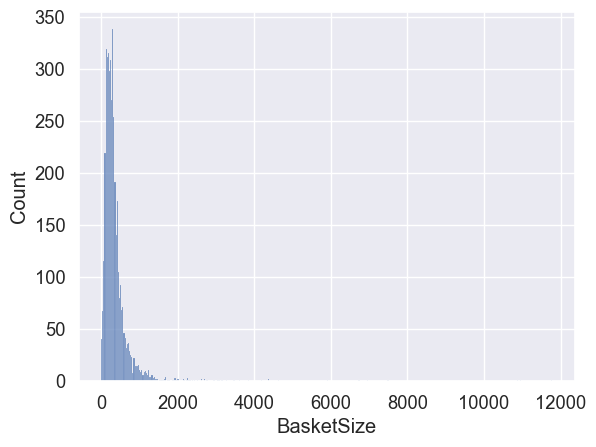

In [65]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["BasketSize"]);

/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


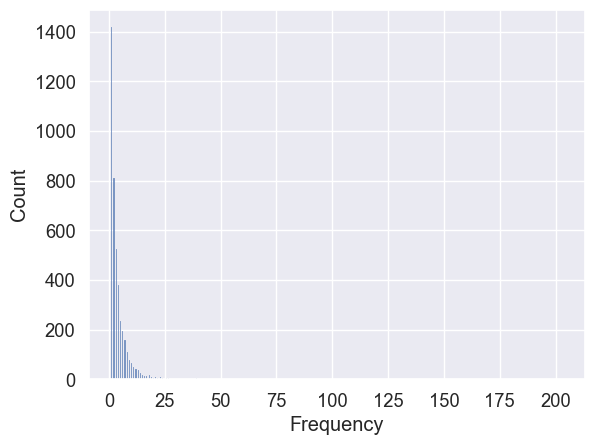

In [66]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Frequency"]);

/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


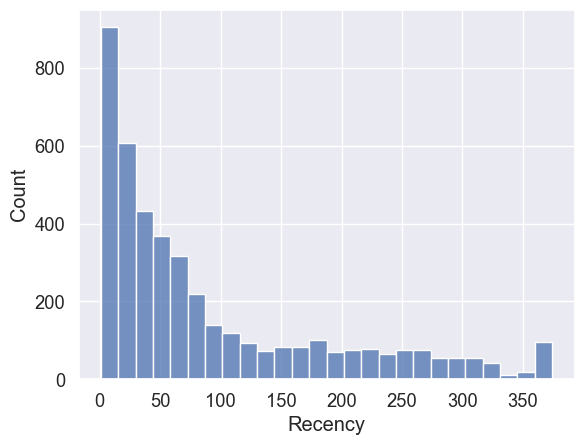

In [67]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Recency"]);

/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/oyakog/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


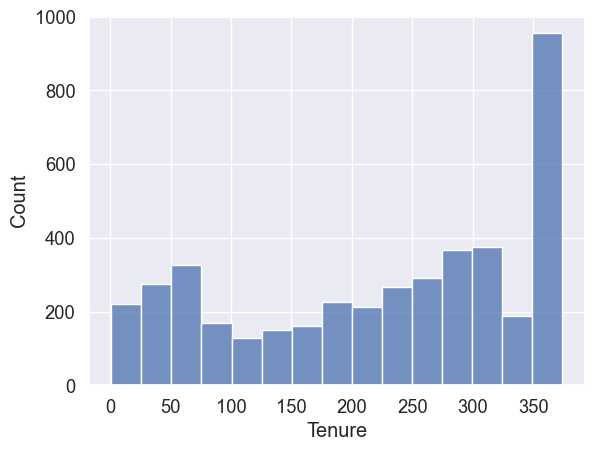

In [68]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Tenure"]);

In [69]:
new_df = pd.DataFrame()

In [70]:
new_df["Need_Attention"] = rfm[rfm["Segment"] == "Need_Attention"].index

In [71]:
new_df.to_csv("Need_Attention.csv")

# CLUSTER - K-MEANS

In [72]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [73]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


In [74]:
rfm.to_csv("rfm_cluster_data.csv")

In [75]:
rfm= pd.read_csv("rfm_cluster_data.csv")
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
0,12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
1,12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
2,12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
3,12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
4,12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


In [ ]:
rfm.shape

In [76]:
rfm = rfm.set_index("Customer ID")

In [77]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


In [ ]:
rfm.shape

In [78]:
#segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore", "TenureScore"]]
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore", "TenureScore"]]

In [79]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,
12346.00000,2,5,2,5
12347.00000,5,2,4,1
12348.00000,2,1,1,1
12349.00000,3,3,5,3
12351.00000,5,1,2,1


In [ ]:
segment_data.shape

In [80]:
segment_data.dtypes

RecencyScore      int64
FrequencyScore    int64
MonetaryScore     int64
TenureScore       int64
dtype: object

In [ ]:
################################
#  Optimal Number of Clusters
################################


In [81]:
range(2, 12)

range(2, 12)

In [82]:
K = range(2, 12)

In [83]:
kmeans = KMeans(n_clusters=4).fit(segment_data)

In [84]:
kmeans.labels_

array([3, 2, 0, ..., 0, 3, 1], dtype=int32)

In [ ]:
print(kmeans.inertia_)

19125.99938961204
14083.184489221589
11522.020034446592
9710.488127815466
8711.913397618462
8003.808134052713
7367.551195176791
6921.2632840770175
6362.9850078396485
6056.847797341981


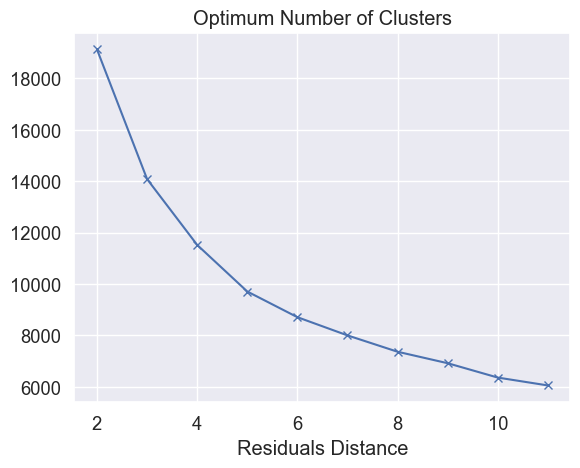

In [85]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()    

#Inertia measures how well a dataset was clustered by K-Means. 
#It is calculated by measuring the distance between each data point and its centroid, 
#squaring this distance, and summing these squares across one cluster. 

In [87]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 2.2 MB/s eta 0:00:0000:0100:01


In [88]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

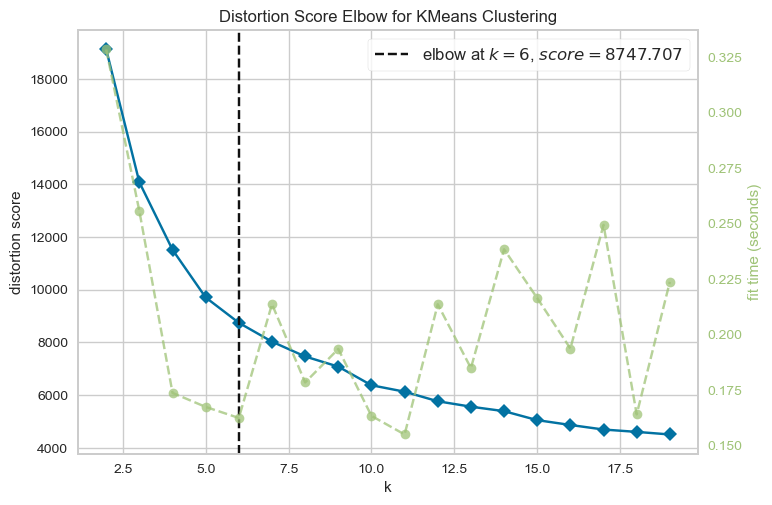

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(segment_data)
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(segment_data)
elbow.show()

In [90]:
kmeans = KMeans(n_clusters=6).fit(segment_data)

In [ ]:
rfm.head()

In [91]:
kmeans.labels_

array([2, 5, 4, ..., 3, 2, 5], dtype=int32)

In [92]:
segment_data["clusters"]  = kmeans.labels_

In [93]:
################################
# Final Clusters
################################
#Uyarilari Kapat
pd.options.mode.chained_assignment = None 

kmeans = KMeans(n_clusters=6).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

In [94]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.00000,2,5,2,5,5
12347.00000,5,2,4,1,2
12348.00000,2,1,1,1,4
12349.00000,3,3,5,3,5
12351.00000,5,1,2,1,3


In [95]:
segment_data["clusters"].value_counts()

clusters
1    908
5    868
4    789
3    721
2    628
0    396
Name: count, dtype: int64

In [96]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00000,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
12347.00000,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
12348.00000,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
12349.00000,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
12351.00000,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


In [97]:
segment_data.head(20)

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,
12346.00000,2,5,2,5,5
12347.00000,5,2,4,1,2
12348.00000,2,1,1,1,4
12349.00000,3,3,5,3,5
12351.00000,5,1,2,1,3
12352.00000,5,2,2,1,3
12353.00000,3,1,2,1,3
12355.00000,1,1,2,2,4
12356.00000,4,3,5,1,2


In [ ]:
rfm.head()

In [ ]:
rfm[["Segment"]].head()

In [ ]:
rfm[["Segment"]].nunique()

In [98]:
################################
# RFM & K-Means Joining..
################################
segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [99]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters
Customer ID,,,,,,
12346.00000,Cant_Loose,2,5,2,5,5
12347.00000,Potential_Loyalists,5,2,4,1,2
12348.00000,Hibernating,2,1,1,1,4
12349.00000,Need_Attention,3,3,5,3,5
12351.00000,New_Customers,5,1,2,1,3


In [100]:
segmentation_2 = segment_data[["clusters"]].merge(rfm, on="Customer ID")

In [101]:
segmentation_2.head()

,clusters,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,,
12346.00000,5,165,11,365,361,2,5,2,5,2525,Cant_Loose,33.18182
12347.00000,2,3,2,1272,40,5,2,4,1,5241,Potential_Loyalists,636.00000
12348.00000,4,74,1,222,74,2,1,1,1,2111,Hibernating,222.00000
12349.00000,5,43,3,2603,225,3,3,5,3,3353,Need_Attention,867.66667
12351.00000,3,11,1,300,11,5,1,2,1,5121,New_Customers,300.00000


In [102]:
segmentation_2.groupby("clusters").agg({'Recency': ['mean'],'Frequency': ['mean'], 'Monetary': ['mean'], 'Tenure': ['mean'] }, ascending=True)

,Recency,Frequency,Monetary,Tenure
,mean,mean,mean,mean
clusters,,,,
0,282.37626,1.51768,310.84091,336.44444
1,17.81718,12.04295,6194.13656,339.54295
2,22.61306,3.77070,1519.46975,147.64809
3,35.36893,1.29404,353.58946,53.95423
4,169.42459,1.21039,331.83777,183.07224
5,106.10714,3.89171,1683.65323,293.19931


In [103]:
segmentation.dtypes

Segment           object
RecencyScore       int64
FrequencyScore     int64
MonetaryScore      int64
TenureScore        int64
clusters           int32
dtype: object

In [104]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4,5
Segment,,,,,,
About_to_Sleep,4,0,10,309,4,15
At_Risk,97,0,2,0,78,436
Cant_Loose,1,0,0,0,0,75
Champions,0,486,177,0,0,0
Hibernating,281,0,0,0,703,30
Loyal_Customers,0,404,159,0,0,179
Need_Attention,4,0,66,29,4,104
New_Customers,0,0,1,49,0,0
Potential_Loyalists,9,18,212,248,0,29


# Hierarchical-Clustering

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [108]:
segment_data1 = segment_data.drop(['clusters','MonetaryScore'], axis=1)

In [109]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00000,2,5,5
12347.00000,5,2,1
12348.00000,2,1,1
12349.00000,3,3,3
12351.00000,5,1,1


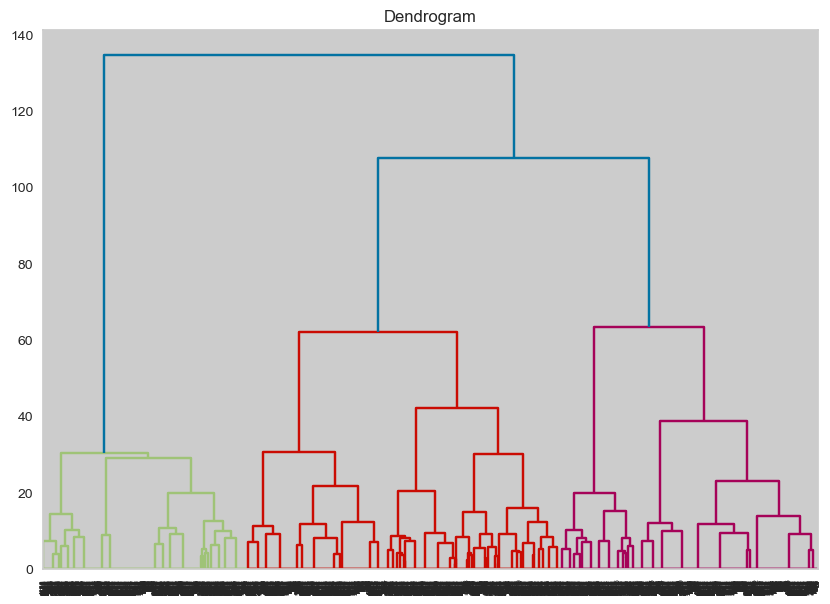

In [110]:
#Dendrogram plot
plt.figure(figsize =(10,7))
plt.title('Dendrogram')

linkage_method = linkage(segment_data1, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method);

In [111]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00000,2,5,5
12347.00000,5,2,1
12348.00000,2,1,1
12349.00000,3,3,3
12351.00000,5,1,1


In [112]:
cluster_ea = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity='euclidean')

In [113]:
cluster_ea

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

# ODEV

In [ ]:
#segmentation.head()

#Sali Gunku Dersi Dinleme
#Bu notebook un on kisminda yer alan Rule-Based konu calistirmak

#RecencyScore	FrequencyScore	MonetaryScore	TenureScore
# KMeans + Hierarchical
# Crosstab..

In [ ]:
#>Tavsiye Sistemleri
#>Basket Analizi
#>AB. Test 
#>IOT Anomali Detection.. 

#>PCA Faktor Analizi